In [1]:
import nltk
import pandas as pd
import numpy as np
import os
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
os.chdir('F:\Board infinity\phonepe')

# Google pay data

In [5]:
df_paytm1 = pd.read_csv('paytm_reviews.csv')
df_paytm1[df_paytm1.Source=='Twitter'].index

Int64Index([25530, 25531, 25532, 25533, 25534, 25535, 25536, 25537, 25538,
            25539,
            ...
            27944, 27945, 27946, 27947, 27948, 27949, 27950, 27951, 27952,
            27953],
           dtype='int64', length=2424)

In [6]:
df_paytm=df_paytm1.drop(index=df_paytm1[df_paytm1.Source=='Twitter'].index)

In [12]:
def processing(text):
    text = re.sub(r'[^ A-Z a-z ]+','',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [13]:
df_paytm_processed = df_paytm.copy()
df_paytm_processed['Reviews'] = df_paytm['Reviews'].apply(processing)
print(df_paytm_processed.head())

              Source                                            Reviews
0  Google_Play_store  It was Good But since few months I was unable ...
1  Google_Play_store  i found it very good in payment and other stuf...
2  Google_Play_store  so far so good Now I am reconsidering if I sho...
3  Google_Play_store  I have good experience with paytm transactions...
4  Google_Play_store  How will I use paytm if I have a wifi tablet W...


In [14]:
nlp = spacy.load('en_core_web_lg')

### tokenisation, lemmatising, POS tagging

#### Finding most important word

In [15]:
def word_cloud(df): 
    comment_words = '' 
    stopwords = spacy.lang.en.stop_words.STOP_WORDS


    for val in df: 
        
        val = str(val) 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)):  
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

    return wordcloud

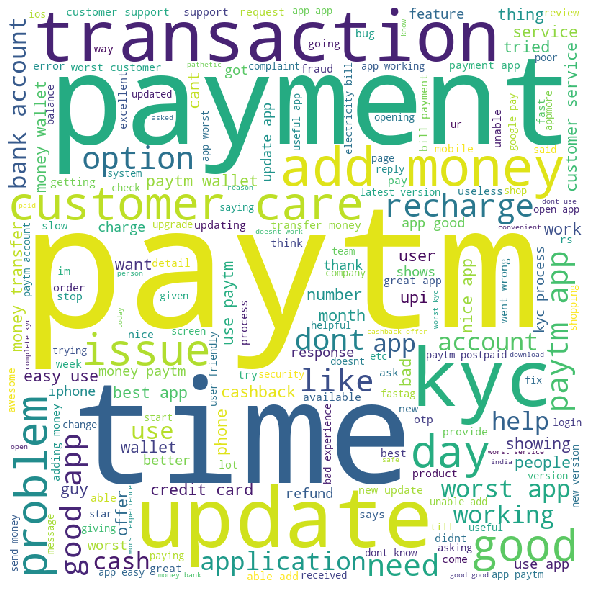

In [16]:
top_words_wordcloud = word_cloud(df_paytm_processed.Reviews).words_

In [17]:
top_20_words_wordcloud = list(top_words_wordcloud.keys())[:20]
print(top_20_words_wordcloud)

['paytm', 'time', 'payment', 'update', 'kyc', 'transaction', 'add money', 'customer care', 'day', 'good', 'problem', 'issue', 'recharge', 'option', 'like', 'need', 'paytm app', 'dont', 'good app', 'application']


### above are top 20 important words from word cloud
### among them 'transaction' and 'time' are highly most imporatant key words

In [18]:
df_transaction = pd.DataFrame()
df_transaction['Reviews'] = df_paytm_processed['Reviews'].apply(lambda x: x if ('time' in x.lower()) and  ('transaction' in x.lower()) else np.nan)
df_transaction.dropna(inplace=True)

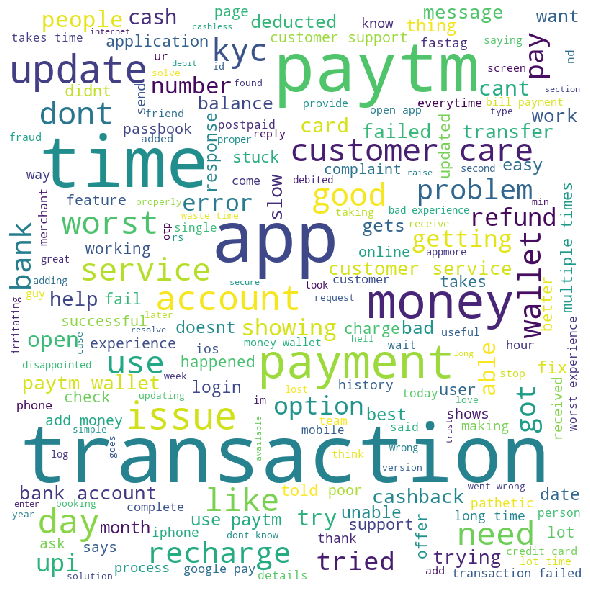

In [19]:
top_words_wc_transaction = word_cloud(df_transaction.Reviews).words_

# POS tagging, tagging and NER analysis

In [20]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [21]:
df_paytm_processed = df_paytm.copy()
df_paytm_processed['Reviews'] = df_paytm['Reviews'].apply(sub_processing)
print(df_paytm_processed.head())

              Source                                            Reviews
0  Google_Play_store  It was Good. But since few months, I was unabl...
1  Google_Play_store  i found it very good in payment and other stuf...
2  Google_Play_store  so far so good Now I am reconsidering if I sho...
3  Google_Play_store  I have good experience with paytm transactions...
4  Google_Play_store  How will I use paytm if I have a wifi tablet. ...


In [22]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)
nouns = []
adjs = []
verbs = []

In [23]:
df_paytm_processed.Reviews.apply(pos_extractor)

0        None
1        None
2        None
3        None
4        None
         ... 
25525    None
25526    None
25527    None
25528    None
25529    None
Name: Reviews, Length: 25530, dtype: object

In [24]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app             15192
money            5603
payment          4268
time             4227
customer         3075
                ...  
notification      221
debit             212
store             209
friend            207
need              207
Name: nouns, Length: 100, dtype: int64


In [25]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good             3718
worst            2689
easy             1671
able             1651
paytm            1489
                 ... 
fine               70
mandatory          69
urgent             69
disappointing      68
indian             68
Name: adjs, Length: 100, dtype: int64


In [26]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use           2885
work          2571
try           2558
add           2511
update        2225
              ... 
feel           197
upgrade        196
sell           192
submit         188
understand     185
Name: verbs, Length: 100, dtype: int64


In [28]:
def ner_detection(review):
    if nlp(review).ents !=():
        for  ent in nlp(review).ents:
            ners.append([ent.text,ent.label_])

ners=[]

In [29]:
df_paytm_processed.Reviews.apply(ner_detection)

0        None
1        None
2        None
3        None
4        None
         ... 
25525    None
25526    None
25527    None
25528    None
25529    None
Name: Reviews, Length: 25530, dtype: object

In [30]:
df_ners = pd.DataFrame(ners,columns=['Text','NER_Label'])
df_ners[df_ners.NER_Label=='CARDINAL'].index
df_ners.drop(index=df_ners[df_ners.NER_Label=='CARDINAL'].index,inplace=True)

In [31]:
print(df_ners.NER_Label.unique())

['DATE' 'ORG' 'PERSON' 'ORDINAL' 'GPE' 'MONEY' 'TIME' 'FAC' 'WORK_OF_ART'
 'PRODUCT' 'NORP' 'LOC' 'LAW' 'QUANTITY' 'LANGUAGE' 'EVENT' 'PERCENT']


In [32]:
df_ners.Text[df_ners.NER_Label=='ORG'].value_counts()

Paytm            4241
KYC              2750
paytm            1808
kyc               847
UPI               405
                 ... 
BHI                 1
nowWeather          1
infocus turbo       1
Air                 1
bss khud            1
Name: Text, Length: 3277, dtype: int64

# Sentiment Analysis of Paytm

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [34]:
df_paytm_processed['scores'] = df_paytm_processed.Reviews.apply(analyzer.polarity_scores)
df_paytm_processed.scores[0]
df_paytm_processed['compound_score_label'] = df_paytm_processed.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_paytm_processed.compound_score_label.value_counts()

pos        12760
neg         9617
neutral     3153
Name: compound_score_label, dtype: int64

In [35]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('not better than phonepe' in x) or ('not better than google' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than paytm' in x) or ('better than phonepe' in x) or ('better than google' in x) or ('best than phonepe' in x) or ('best than google' in x) or ('good than phonepe' in x) or ('good than google' in x) or ('faster than phonepe' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'

In [37]:
df_paytm_processed['temp'] = df_paytm_processed['Reviews'].apply(keyword_analyzer)

In [38]:
for index in df_paytm_processed.index:
    if df_paytm_processed['temp'][index] != None:
        df_paytm_processed.compound_score_label[index]=df_paytm_processed['temp'][index]

In [39]:
df_paytm_processed.drop(columns=['temp'],inplace=True)
df_paytm_processed.compound_score_label.value_counts()

pos        12393
neg        10101
neutral     3036
Name: compound_score_label, dtype: int64

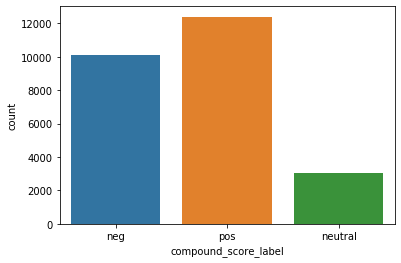

In [40]:
ax = sns.countplot(x='compound_score_label', data=df_paytm_processed)

# Sentiment analysis of paytm on the basis of payment_experience

In [41]:
df_paytm_payment_Experience = pd.DataFrame()
df_paytm_payment_Experience['Reviews'] = df_paytm_processed['Reviews'].apply(lambda x: x.lower() if ('transaction' in x.lower()) or ('service' in x.lower()) or ('payment' in x.lower()) or ('bank' in x.lower()) or ('payment' in x.lower())
or ('transfer' in x.lower()) or ('refund' in x.lower()) or ('merchant' in x.lower()) or ('credited' in x.lower()) or ('debited' in x.lower()) or ('upi' in x.lower()) or ('otp' in x.lower()) or ('time' in x.lower()) or ('fail' in x.lower()) or ('p2p' in x.lower()) or ('return' in x.lower()) else np.nan)
df_paytm_payment_Experience.dropna(inplace=True)

In [42]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

In [43]:
nouns = []
adjs = []
verbs = []

In [44]:
df_paytm_payment_Experience.Reviews.apply(pos_extractor)

0        None
1        None
2        None
3        None
4        None
         ... 
25464    None
25478    None
25484    None
25495    None
25518    None
Name: Reviews, Length: 12590, dtype: object

In [45]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app         7829
money       3936
payment     3128
time        3049
service     2440
            ... 
query        140
star         135
hours        134
data         133
security     132
Name: nouns, Length: 100, dtype: int64


In [46]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

worst            1798
good             1793
paytm            1359
able              852
bad               825
                 ... 
dear               41
huge               41
disappointing      41
sad                40
fine               40
Name: adjs, Length: 100, dtype: int64


In [47]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use          1451
add           873
pay           852
working       722
tried         690
             ... 
started       115
charging      114
raise         113
happening     113
find          113
Name: verbs, Length: 100, dtype: int64


In [48]:
df_paytm_payment_Experience['scores'] = df_paytm_payment_Experience.Reviews.apply(analyzer.polarity_scores)
df_paytm_payment_Experience.scores[1]
df_paytm_payment_Experience['compound_score_label'] = df_paytm_payment_Experience.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_paytm_payment_Experience.compound_score_label.value_counts()

pos        5858
neg        5509
neutral    1223
Name: compound_score_label, dtype: int64

In [49]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('not better than phonepe' in x) or ('not better than google' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than paytm' in x) or ('better than phonepe' in x) or ('better than google' in x) or ('best than phonepe' in x) or ('best than google' in x) or ('good than phonepe' in x) or ('good than google' in x) or ('faster than phonepe' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'

In [50]:
df_paytm_payment_Experience['temp'] = df_paytm_payment_Experience['Reviews'].apply(keyword_analyzer)

In [51]:
for index in df_paytm_payment_Experience.index:
    if df_paytm_payment_Experience['temp'][index] != None:
        df_paytm_payment_Experience.compound_score_label[index]=df_paytm_payment_Experience['temp'][index]      

In [52]:
df_paytm_payment_Experience.drop(columns=['temp'],inplace=True)
df_paytm_payment_Experience.compound_score_label.value_counts()

neg        5983
pos        5490
neutral    1117
Name: compound_score_label, dtype: int64

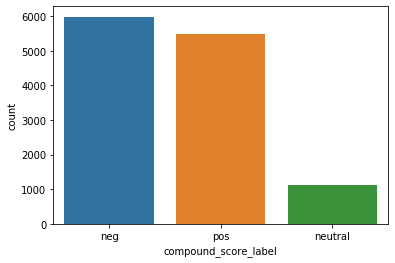

In [53]:
ax = sns.countplot(x='compound_score_label', data=df_paytm_payment_Experience)

# sentiment analysis of phonepe on the basis of offer

In [54]:
df_paytm_offer = pd.DataFrame()
df_paytm_offer['Reviews'] = df_paytm_processed['Reviews'].apply(lambda x: x.lower() if ('reward' in x.lower()) or ('coupon' in x.lower()) or ('scratch card' in x.lower()) or ('cashback' in x.lower()) or ('offer' in x.lower())
or ('discount' in x.lower()) or ('recharge' in x.lower()) or ('electricity' in x.lower()) or ('bill' in x.lower()) or ('gold' in x.lower())or ('switch' in x.lower()) or ('swiggy' in x.lower()) or ('dominos' in x.lower()) or ('train' in x.lower()) or ('qr' in x.lower()) else np.nan)
df_paytm_offer.dropna(inplace=True)

In [55]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

In [56]:
nouns = []
adjs = []
verbs = []

In [57]:
df_paytm_offer.Reviews.apply(pos_extractor)

0        None
2        None
5        None
7        None
8        None
         ... 
25352    None
25358    None
25397    None
25415    None
25419    None
Name: Reviews, Length: 4203, dtype: object

In [58]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app        2633
payment    1190
bill       1130
offer       952
money       929
           ... 
company      42
rupee        40
case         39
utility      39
debit        38
Name: nouns, Length: 100, dtype: int64


In [59]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good       734
worst      401
best       358
paytm      338
easy       303
          ... 
main        15
related     15
handy       14
clear       14
stuck       14
Name: adjs, Length: 100, dtype: int64


In [60]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

recharge     987
pay          958
use          480
try          425
get          404
            ... 
recommend     31
pende         31
earn          31
close         31
link          29
Name: verbs, Length: 100, dtype: int64


In [61]:
df_paytm_offer['scores'] = df_paytm_offer.Reviews.apply(analyzer.polarity_scores)
#df_phonepe_offer.scores[2]
df_paytm_offer['compound_score_label'] = df_paytm_offer.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_paytm_offer.compound_score_label.value_counts()

pos        2252
neg        1543
neutral     408
Name: compound_score_label, dtype: int64

In [62]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('not better than phonepe' in x) or ('not better than google' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than paytm' in x) or ('better than phonepe' in x) or ('better than google' in x) or ('best than phonepe' in x) or ('best than google' in x) or ('good than phonepe' in x) or ('good than google' in x) or ('faster than phonepe' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'

In [63]:
df_paytm_offer['temp'] = df_paytm_offer['Reviews'].apply(keyword_analyzer)

In [64]:
for index in df_paytm_offer.index:
    if df_paytm_offer['temp'][index] != None:
        df_paytm_offer.compound_score_label[index]=df_paytm_offer['temp'][index]

In [65]:
df_paytm_offer.drop(columns=['temp'],inplace=True)
df_paytm_offer.compound_score_label.value_counts()

pos        2140
neg        1701
neutral     362
Name: compound_score_label, dtype: int64

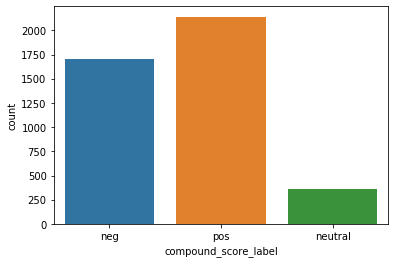

In [66]:
ax = sns.countplot(x='compound_score_label', data=df_paytm_offer)

# sentiment analysis of phonepe on the basis of AppUI

In [67]:
df_paytm_AppUI = pd.DataFrame()
df_paytm_AppUI['Reviews'] = df_paytm_processed['Reviews'].apply(lambda x: x.lower() if ('feature' in x.lower()) or ('hang' in x.lower()) or ('crashing' in x.lower()) or ('stucking' in x.lower()) or ('ui ' in x.lower())
or ('user interface' in x.lower()) or ('user friendly' in x.lower()) or ('fast' in x.lower()) or ('slow' in x.lower()) or ('easy' in x.lower()) or ('design' in x.lower()) or ('sleek' in x.lower()) else np.nan)
df_paytm_AppUI.dropna(inplace=True)

In [68]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [70]:
df_paytm_AppUI.Reviews.apply(pos_extractor)

5        None
10       None
13       None
14       None
16       None
         ... 
25213    None
25235    None
25283    None
25388    None
25493    None
Name: Reviews, Length: 5264, dtype: object

In [71]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app         3660
payment     1065
time         833
money        768
update       540
            ... 
mode          44
merchant      43
hour          42
second        42
refund        42
Name: nouns, Length: 100, dtype: int64


In [72]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

easy             1712
good              775
slow              694
fast              631
worst             342
                 ... 
complete           16
disappointing      16
second             16
effective          16
white              15
Name: adjs, Length: 100, dtype: int64


In [73]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use        979
work       473
pay        463
crash      389
get        380
          ... 
s           38
apply       38
write       38
operate     38
launch      35
Name: verbs, Length: 100, dtype: int64


In [77]:
df_paytm_AppUI['scores'] = df_paytm_AppUI.Reviews.apply(analyzer.polarity_scores)
#df_paytm_AppUI.scores[1]
df_paytm_AppUI['compound_score_label'] = df_paytm_AppUI.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_paytm_AppUI.compound_score_label.value_counts()

pos        3356
neg        1325
neutral     583
Name: compound_score_label, dtype: int64

In [78]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('not better than phonepe' in x) or ('not better than google' in x) or ('waste than phonepe' in x):
        return 'neg'
    elif ('not better than paytm' in x) or ('better than phonepe' in x) or ('better than google' in x) or ('best than phonepe' in x) or ('best than google' in x) or ('good than phonepe' in x) or ('good than google' in x) or ('faster than phonepe' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'

In [79]:
df_paytm_AppUI['temp'] = df_paytm_AppUI['Reviews'].apply(keyword_analyzer)

In [80]:
for index in df_paytm_AppUI.index:
    if df_paytm_AppUI['temp'][index] != None:
        df_paytm_AppUI.compound_score_label[index]=df_paytm_AppUI['temp'][index]

In [81]:
df_paytm_AppUI.drop(columns=['temp'],inplace=True)
df_paytm_AppUI.compound_score_label.value_counts()

pos        3275
neg        1430
neutral     559
Name: compound_score_label, dtype: int64

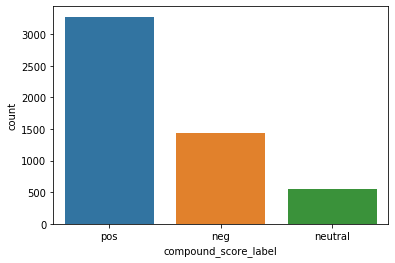

In [82]:
ax = sns.countplot(x='compound_score_label', data=df_paytm_AppUI)